<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%ED%85%80%ED%94%84%EB%8B%A4%EA%B5%AC%EC%B0%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data=pd.read_csv('./student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [19]:
category_data=pd.DataFrame()
for c in data:
  for v in data[c]:
    if type(v) == str:
      h=data[c]
      category_data=pd.concat([category_data,h],axis=1)

In [33]:
category_dataset=category_data.T
category_dataset=category_dataset.drop_duplicates()
category_dataset=category_dataset.T
category_dataset

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [34]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
data_taguchi=encoder.fit_transform(category_dataset)
data_taguchi

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [35]:
data_taguchi=pd.DataFrame(data_taguchi,columns=category_dataset.columns, index=category_dataset.index)
data_taguchi

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
391,1.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
392,1.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
393,1.0,1.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [37]:
encoder.categories_

[array(['GP', 'MS'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['R', 'U'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['course', 'home', 'other', 'reputation'], dtype=object),
 array(['father', 'mother', 'other'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [39]:
for x in data:
  for y in data_taguchi:
    if x == y:
      data[x]=data_taguchi[y]
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,0.0,1.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,0.0,0.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,2.0,1.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1.0,1.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1.0,0.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20,1.0,1.0,0.0,2,2,3.0,3.0,0.0,2.0,1,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5,5,4,4,5,4,11,9,9,9
391,1.0,1.0,17,1.0,1.0,1.0,3,1,3.0,3.0,0.0,1.0,2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,4,5,3,4,2,3,14,16,16
392,1.0,1.0,21,0.0,0.0,1.0,1,1,2.0,2.0,0.0,2.0,1,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,3,3,3,3,3,10,8,7
393,1.0,1.0,18,0.0,1.0,1.0,3,2,3.0,2.0,0.0,1.0,3,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4,4,1,3,4,5,0,11,12,10


In [44]:
data=data.astype(float)

In [45]:
data_corr=data.corr()
data_corr

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,-0.090010,0.011109,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,-0.095867,-0.071343,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,-0.015337,0.290485,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,-0.047891,-0.044512,-0.328096,-0.020912,-0.078578,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,-0.019212,-0.002718,0.063493,-0.073595,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,-0.003553,-0.108715,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,0.117653,-0.023918,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,0.043099,-0.133644,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,0.022022,0.014787,-0.109752,-0.023097,-0.073377,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,-0.027688,-0.080511,0.055878,-0.076817,-0.008275,-0.011657,-0.030159,-0.040435,0.032391,-0.030812,-0.045250,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


In [64]:
#상관성 분석
dataset=data+0.5
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.5,0.5,18.5,1.5,0.5,0.5,4.5,4.5,0.5,4.5,0.5,1.5,2.5,2.5,0.5,1.5,0.5,0.5,0.5,1.5,1.5,0.5,0.5,4.5,3.5,4.5,1.5,1.5,3.5,6.5,5.5,6.5,6.5
1,0.5,0.5,17.5,1.5,0.5,1.5,1.5,1.5,0.5,2.5,0.5,0.5,1.5,2.5,0.5,0.5,1.5,0.5,0.5,0.5,1.5,1.5,0.5,5.5,3.5,3.5,1.5,1.5,3.5,4.5,5.5,5.5,6.5
2,0.5,0.5,15.5,1.5,1.5,1.5,1.5,1.5,0.5,2.5,2.5,1.5,1.5,2.5,3.5,1.5,0.5,1.5,0.5,1.5,1.5,1.5,0.5,4.5,3.5,2.5,2.5,3.5,3.5,10.5,7.5,8.5,10.5
3,0.5,0.5,15.5,1.5,0.5,1.5,4.5,2.5,1.5,3.5,1.5,1.5,1.5,3.5,0.5,0.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,3.5,2.5,2.5,1.5,1.5,5.5,2.5,15.5,14.5,15.5
4,0.5,0.5,16.5,1.5,0.5,1.5,3.5,3.5,2.5,2.5,1.5,0.5,1.5,2.5,0.5,0.5,1.5,1.5,0.5,1.5,1.5,0.5,0.5,4.5,3.5,2.5,1.5,2.5,5.5,4.5,6.5,10.5,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.5,1.5,20.5,1.5,1.5,0.5,2.5,2.5,3.5,3.5,0.5,2.5,1.5,2.5,2.5,0.5,1.5,1.5,0.5,1.5,1.5,0.5,0.5,5.5,5.5,4.5,4.5,5.5,4.5,11.5,9.5,9.5,9.5
391,1.5,1.5,17.5,1.5,1.5,1.5,3.5,1.5,3.5,3.5,0.5,1.5,2.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,1.5,0.5,2.5,4.5,5.5,3.5,4.5,2.5,3.5,14.5,16.5,16.5
392,1.5,1.5,21.5,0.5,0.5,1.5,1.5,1.5,2.5,2.5,0.5,2.5,1.5,1.5,3.5,0.5,0.5,0.5,0.5,0.5,1.5,0.5,0.5,5.5,5.5,3.5,3.5,3.5,3.5,3.5,10.5,8.5,7.5
393,1.5,1.5,18.5,0.5,1.5,1.5,3.5,2.5,3.5,2.5,0.5,1.5,3.5,1.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5,1.5,0.5,4.5,4.5,1.5,3.5,4.5,5.5,0.5,11.5,12.5,10.5


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


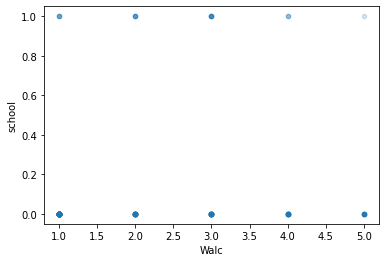

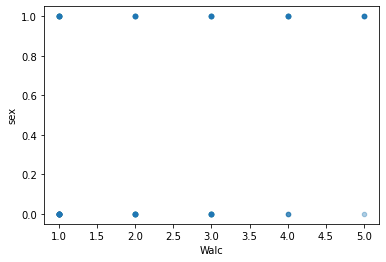

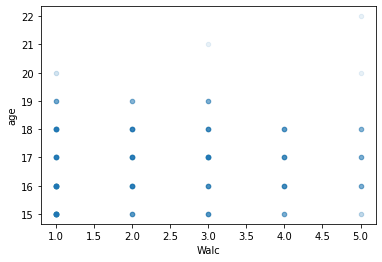

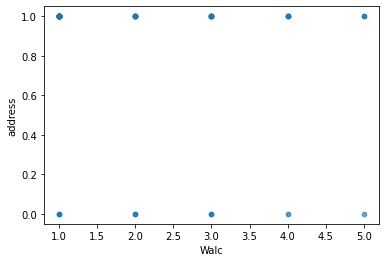

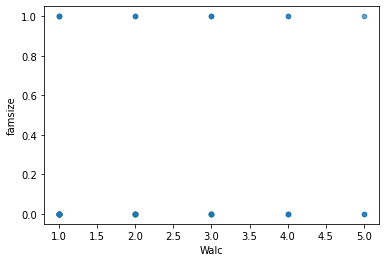

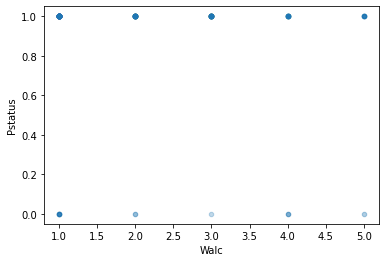

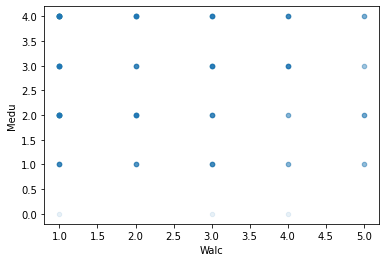

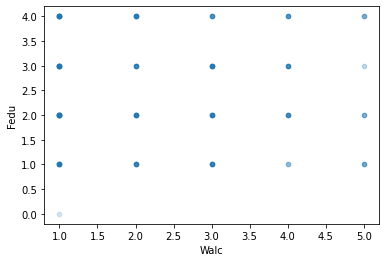

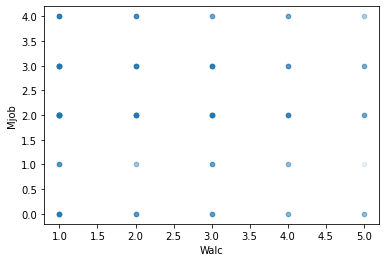

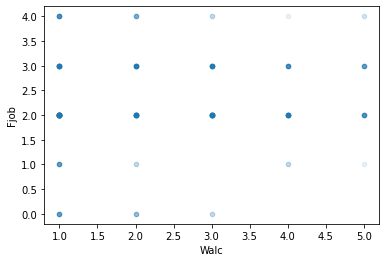

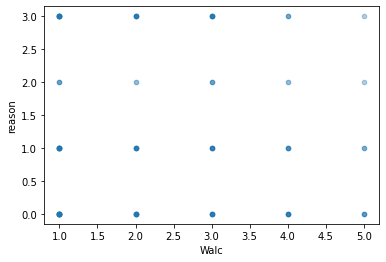

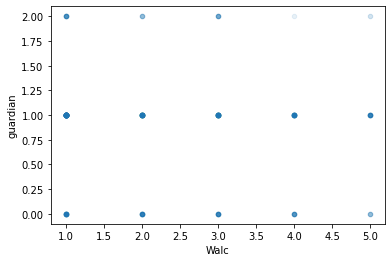

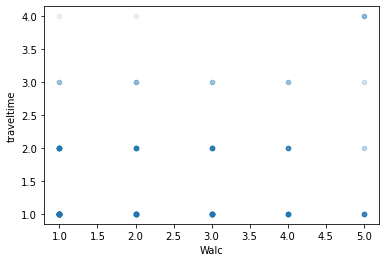

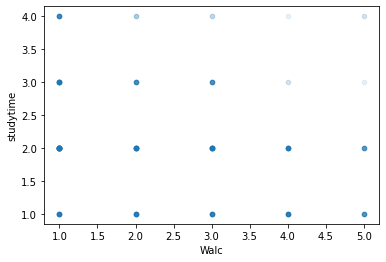

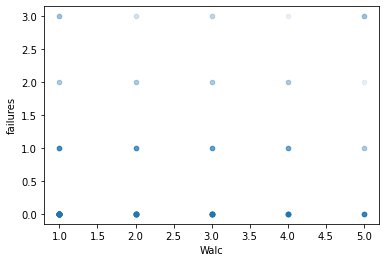

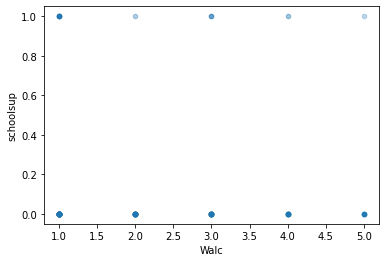

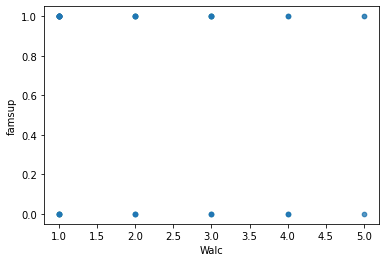

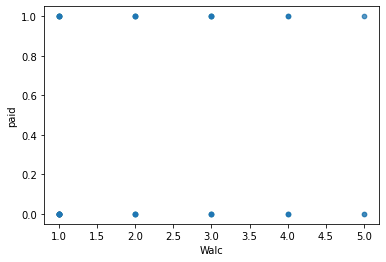

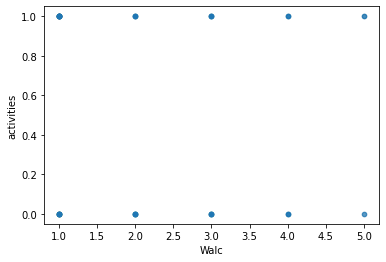

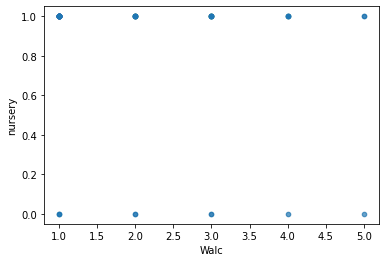

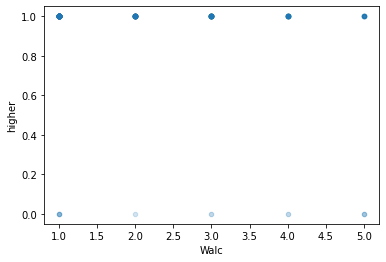

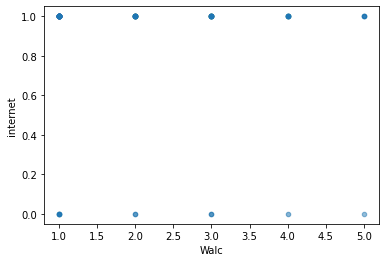

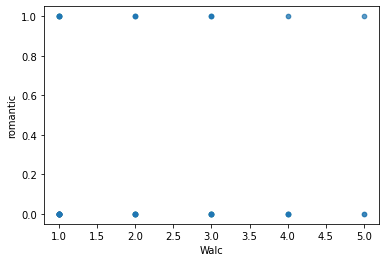

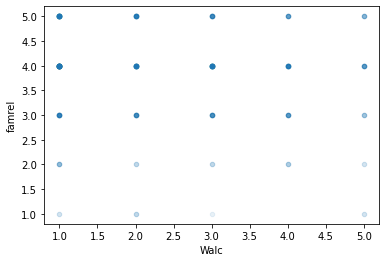

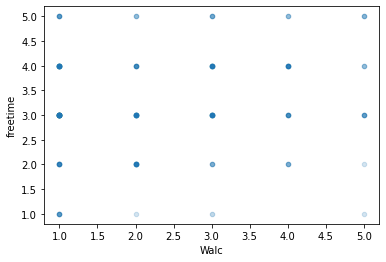

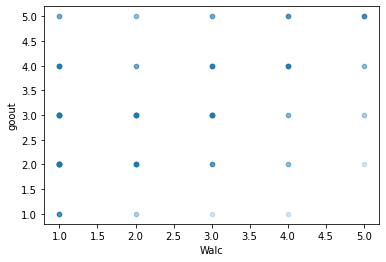

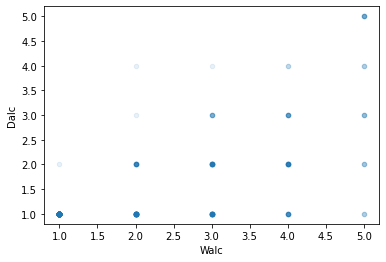

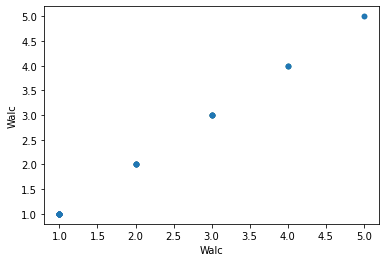

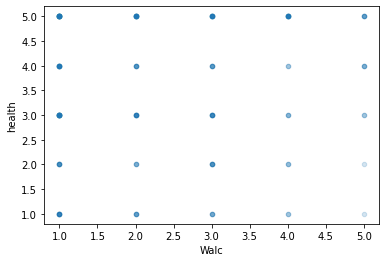

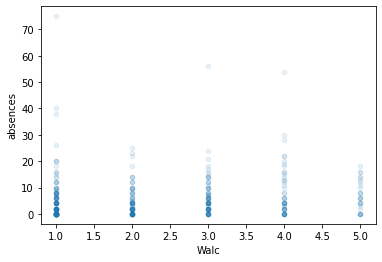

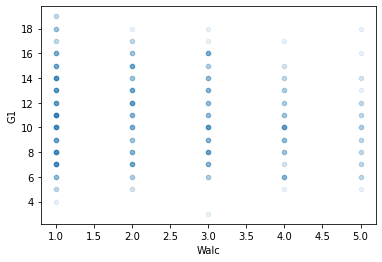

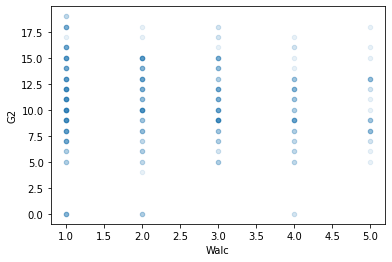

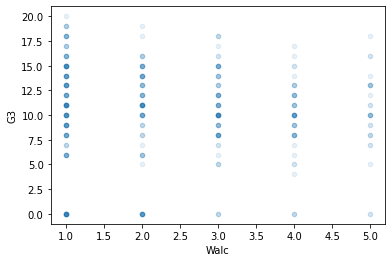

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
t='Walc'
for i in dataset:
  data.plot(kind='scatter',x=t, y=i, alpha=0.1)

In [70]:
print(data_corr['Walc'].sort_values(ascending=False))

Walc          1.000000
Dalc          0.647544
goout         0.420386
sex           0.274194
freetime      0.147822
failures      0.141962
absences      0.136291
traveltime    0.134116
age           0.117276
famsize       0.103425
health        0.092476
Fjob          0.070024
school        0.065087
paid          0.060454
internet      0.011687
Pstatus       0.006045
romantic     -0.010141
Mjob         -0.012051
Fedu         -0.012631
activities   -0.037477
guardian     -0.040810
reason       -0.044699
Medu         -0.047123
G3           -0.051939
G2           -0.084927
famsup       -0.086688
schoolsup    -0.087152
nursery      -0.099534
higher       -0.100340
address      -0.101126
famrel       -0.113397
G1           -0.126179
studytime    -0.253785
Name: Walc, dtype: float64
